# Week 7 Problem 4

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select *Kernel*, and restart the kernel and run all cells (*Restart & Run all*).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select *File* → *Save and CheckPoint*)

5. When you are ready to submit your assignment, go to *Dashboard* → *Assignments* and click the *Submit* button. Your work is not submitted until you click *Submit*.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

# Due Date: 6 PM, March 5, 2018

In [1]:
% matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.testing import assert_array_equal
from nose.tools import assert_equal, assert_true, assert_almost_equal, assert_is_instance, assert_is_not
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import sklearn.metrics as skm
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
# We do this to ignore several specific warnings
import warnings
warnings.filterwarnings("ignore")

## Blob Dataset
For this assignment, we will be creating our own dataset using the `make_blobs` built-in function in the sklearn library. This function when specified with parameters will create isotropic Gaussian blobs that can be used for clustering.

In [2]:
'''
NOTE: Make sure to load this data set before completing the assignment
'''
# Load in the dataset as a Pandas DataFrame
data, labels = make_blobs(n_samples=500, centers=7, cluster_std=0.75, random_state=0)
data = data[:, ::-1] # flip axes for better plotting
# View the dataset
df = pd.DataFrame(dict(x=data[:,0], y=data[:,1], label=labels))
# Preview the first few lines
df.head()

,label,x,y
0,5,-0.428224,6.293446
1,2,2.249696,-1.321017
2,5,-1.106093,7.707401
3,4,-3.040381,8.995227
4,6,10.266651,1.394742


## Question 1

In this question, we will use `K-means` clustering in order to determine the number of clusters in our dataset. Complete the following function `get_best_score` that takes in 3 parameters: `start`, `stop`, and `data`.

- Use `start` and `stop` as the range of potential `n_clusters` to explore to find the optimal number of clusters. Use `n_init=10` and `random_state=23` as the parameters to the `KMeans` constructor call also
- In order to determine the optimal number of clusters without graphing and using the Elbow method, we can use Silhouette Analysis in order to determine a ballparked number for the optimal number of clusters. In essence, this means that the **n_cluster size that has the highest `silhouette_score` will most likely be the optimal cluster size**.
- Therefore, iterate from `start` to `stop` (inclusive) and determine the `n_cluster` size that has the highest silhouette score and return a 2-tuple of the KMeans estimator with the highest silhouette score and the value of cluster size as an integer from the function.
- Call `skm.silhouette_score` with `euclidean` as the value for `metric` parameter and pass the data and the `KMeans.labels_` as the parameters as well.

In [20]:
def get_best_score(start, stop, data):
    '''    
    Use Silhouette Analysis to determine the optimal size of clusters
    
    Parameters
    ----------
    start: An int
    stop: An int
    data: A numpy.ndarray
    
    Returns
    -------
    A 2-tuple of KMeans object and an int
    '''
    # YOUR CODE HERE
    best_score = 0
    for i in range(start, stop+1):
        model = KMeans(n_clusters=i, n_init=10, random_state=23)
        model = model.fit(data)
        labels = model.fit_predict(data)
        
        shc = skm.silhouette_score(data, labels, metric='euclidean')
        if shc > best_score:
            best_score = shc
            best_model = model
            best_k = i
    return model, best_k

In [22]:
best_model, best_score = get_best_score(2, 12, data)
assert_equal(best_score, 7) 
assert_true(best_model, isinstance(best_model, KMeans))

## Question 2

Now that we have used the Silhouette Analysis to determine the optimal number of clusters, we will validate this by using the Elbow method. Finish the function `get_elbow_plot_params` that returns the `x` and `y` arrays as a 2-tuple needed to plot the Elbow plot. 

- The x_values will be an array of values from `start` to `stop` (inclusive). `start` and `stop` are parameters into the function.
- The y_values will be an array of values of the respective inertias from each of the `x_values` (i.e. create a KMeans object with each value in `x_values` and fit the model, and use the `inertia_` attribute as the y-value for the respective x-value.
- In the call to the `KMeans` constructor, please `n_init=10` and `random_state=23` as the constructor parameters.

In [46]:
def get_elbow_plot_params(start, stop, data):
    '''
    Get the x and y values needed to plot the Elbow method plot
    
    Parameters
    ----------
    start: An int
    stop: An int
    data: A numpy.ndarray
    
    Returns
    -------
    A 2-tuple of 2 lists: the n_clusters array and the respective inertias array
    '''
    # YOUR CODE HERE
    x = []
    y = np.arange(start, stop+1)
    for i in range(start, stop+1):
        model = KMeans(n_clusters=i, n_init=10,random_state=23)
        model.fit(data)
        x.append(model.inertia_)
    return y, x

In [47]:
x_values, y_values = get_elbow_plot_params(2, 12, data)
assert_equal(len(x_values), len(y_values))
assert_equal(x_values[0], 2)
assert_equal(x_values[-1], 12)

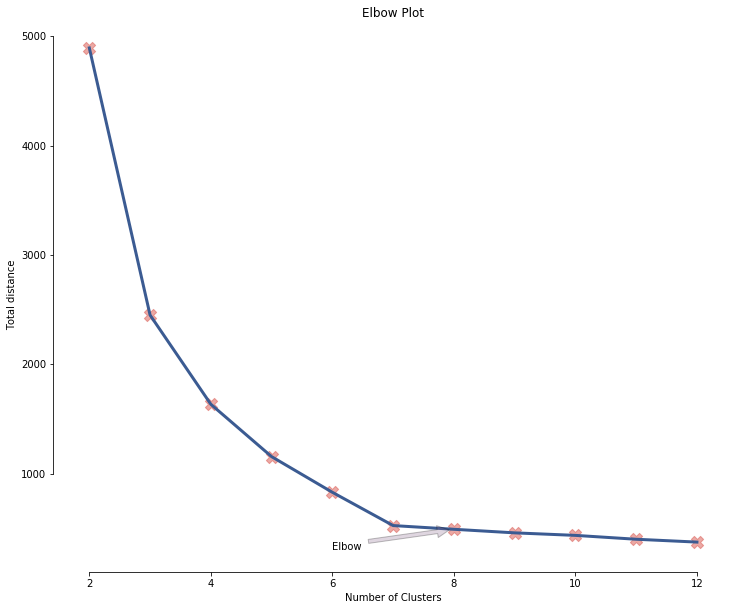

In [48]:
# Plot elbow method
fig, ax = plt.subplots(figsize=(12, 10))
x_values, y_values = get_elbow_plot_params(2, 12, data)

# Draw points and connect them
ax.scatter(x_values, y_values, s=150, 
           c=sns.xkcd_rgb['pale red'], marker='X', alpha=0.5)
ax.plot(x_values, y_values, lw=3, linestyle='-', 
        color=sns.xkcd_rgb['denim blue'])

# Define elbow at three clusters
elb = (x_values[6], y_values[6])

# Draw an arrow showing the elbow
ax.annotate('Elbow', xytext=[6, 300], xy=elb,
                arrowprops=dict(facecolor=sns.xkcd_rgb['dusty purple'], 
                                alpha=0.25, shrink=0.05))

# Decorate Plot
ax.set(title='Elbow Plot', 
       xlabel='Number of Clusters', 
       ylabel='Total distance')
sns.despine(offset=5, trim=True)

As you can see from above, the Elbow is roughly around 7 clusters which is what we created our initial dataset as and it is also what we received as our answer from our silhouette analysis.

## Question 3

In this question, you will determine the best covariance type that yields the highest scoring GaussianMixture Model while using the `adjusted_rand_info` as the performance metric. Use `n_components=6` and `random_state=23` as the parameters to the Mixture Model. Return the name of the highest scoring variance type.

In [56]:
def best_covariance_type(data, labels):
    '''
    Returns the name of the highest scoring covariance type.
    
    Parameters
    ----------
    data: A numpy.ndarray
    labels: A numpy.ndarray
    
    Returns
    -------
    A string
    '''
    c_type = ['spherical', 'diag', 'tied', 'full']
    # YOUR CODE HERE
    best_score = 0
    for i in c_type:
        model = GaussianMixture(covariance_type=i, n_components=6, random_state=23)
        model = model.fit(data)
        pred = model.predict(data)
        score = skm.adjusted_rand_score(labels, pred)
        if score > best_score:
            best_score = score
            best_model = i
    
    return best_model

In [57]:
assert_equal(best_covariance_type(data, labels), 'full')
assert_equal(best_covariance_type(data[0:100], labels[0:100]), 'full')